In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, KFold
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import r2_score
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
training_data = pd.read_csv(r'C:\Users\Asus\Downloads/hip_fracture_training.csv')

In [3]:
training_data.head()

,HIP_PREOP_DEMENTIA,HIP_PREOP_DELIRIUM,HIP_PREOP_BONEMEDS,HIP_PREOP_MOBAID,HIP_PREOP_PRESSORE,HIP_MED_COMGMT,HIP_STDCARE,HIP_WBAT_POD1,HIP_DVT_28D,HIP_FRACTYPE,HIP_PATHFRAC,HIP_POST_PRESSORE,HIP_POST_DELIRIUM,HIP_POST_MOBAID,HIP_POST_BONEMEDS,SEX,RACE_NEW,ETHNICITY_HISPANIC,CPT,WORKRVU,INOUT,TRANST,AGE,OPERYR,DISCHDEST,ANESTHES,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,WNDINF,STEROID,WTLOSS,BLEEDIS,TRANSFUS,PRSEPIS,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE,EMERGNCY,ASACLAS,OPTIME,TOTHLOS,ADMQTR,HTOODAY,NSUPINFEC,SUPINFEC,SSSIPATOS,NWNDINFD,WNDINFD,DSSIPATOS,NORGSPCSSI,ORGSPCSSI,OSSIPATOS,NDEHIS,DEHIS,NOUPNEUMO,OUPNEUMO,PNAPATOS,NREINTUB,REINTUB,NPULEMBOL,PULEMBOL,NFAILWEAN,FAILWEAN,VENTPATOS,NRENAINSF,RENAINSF,NOPRENAFL,OPRENAFL,NURNINFEC,URNINFEC,UTIPATOS,NCNSCVA,CNSCVA,NCDARREST,CDARREST,NCDMI,CDMI,NOTHBLEED,OTHBLEED,NOTHDVT,OTHDVT,NOTHSYSEP,OTHSYSEP,SEPSISPATOS,NOTHSESHOCK,OTHSESHOCK,SEPSHOCKPATOS,RETURNOR,DOPTODIS,OTHCDIFF,GenderData_1,GenderData_2,GenderData_3,RaceData_4,RaceData_5,RaceData_Black,RaceData_7,RaceData_8,RaceData_9,RaceData_10,RaceData_11,Ethnicity_14,TransferStatus_15,TransferStatus_16,TransferStatus_17,TransferStatus_18,TransferStatus_19,TransferStatus_20,DispoLocationPost_21,DispoLocationPost_22,DispoLocationPost_23,DispoLocationPost_24,DispoLocationPost_25,DispoLocationPost_26,DispoLocationPost_27,DispoLocationPost_28,DispoLocationPost_29,DispoLocationPost_30,DispoLocationPost_31,DispoLocationPost_32,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,SSIPost_80,DeepSSIPost_81,OrganSpacePost_84,WoundDisruptionPost_86,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,VentPost_94,ProgRenalPost_96,AcuterenalPost_97,UTIPost_100,CardiacArrestPost_103,MIPost_105,BleedingTfnPost_108,DVTPost_109,SepsisPost_112,SepticShockPost_114,ReOPPost_116,BMI,ObesityBinary,CardiacComplications,InfectiousComplications,Stroke_2,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,MEDMGMT_13,MEDMGMT_14,MEDMGMT_15,StandardHip_17,WBATPOD1_18,WBATPOD1_21,DVTProphylaxisPost28_24,PostOpPRESSORE_26,PostOpDelirium_29,PostOpMobAid_33,PostOpBoneMed_35,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_49,PathologicHipFractures_50,PathologicHipFractures_51,MinorityPatient,DischargeNotHome,PartialorFullFuncStatus,DiabetesBinary,MFI5,READMISSION30D
0,No,No,No,No,No,Yes-co-management throughout stay,Yes,Yes,Yes,"Femoral neck fracture (subcapital, Garden type...",None,No,No,Yes,Yes,female,White,NaN,27236,17.61,Inpatient,Not transferred (admitted from home),73,2016,Rehab,Spinal,No,60,115,NO,No,No,Independent,No,No,No,No,No,No,No,No,No,No,No,No,No,None,139.0,17.0,0.67,11.6,36.4,252.0,No,2-Mild Disturb,101,5,4,1,0,No Complication,No,0,No Complication,No,0,No Complication,No,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,No,No,4,No Complication,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.456944,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,Yes,Yes,Yes,No,No,Yes-co-management throughout stay,No,Yes,No,"Femoral neck fracture (subcapital, Garden type...",None,No,Yes,Yes,Yes,female,White,NaN,27236,17.61,Inpatient,Not transferred (admitted from home),90,2016,"Skilled Care, Not Hom

In [4]:
training_data.shape

(29188, 219)

In [5]:
for col in training_data.columns:
    print(col)

HIP_PREOP_DEMENTIA
HIP_PREOP_DELIRIUM
HIP_PREOP_BONEMEDS
HIP_PREOP_MOBAID
HIP_PREOP_PRESSORE
HIP_MED_COMGMT
HIP_STDCARE
HIP_WBAT_POD1
HIP_DVT_28D
HIP_FRACTYPE
HIP_PATHFRAC
HIP_POST_PRESSORE
HIP_POST_DELIRIUM
HIP_POST_MOBAID
HIP_POST_BONEMEDS
SEX
RACE_NEW
ETHNICITY_HISPANIC
CPT
WORKRVU
INOUT
TRANST
AGE
OPERYR
DISCHDEST
ANESTHES
ELECTSURG
HEIGHT
WEIGHT
DIABETES
SMOKE
DYSPNEA
FNSTATUS2
VENTILAT
HXCOPD
ASCITES
HXCHF
HYPERMED
RENAFAIL
DIALYSIS
DISCANCR
WNDINF
STEROID
WTLOSS
BLEEDIS
TRANSFUS
PRSEPIS
PRSODM
PRBUN
PRCREAT
PRWBC
PRHCT
PRPLATE
EMERGNCY
ASACLAS
OPTIME
TOTHLOS
ADMQTR
HTOODAY
NSUPINFEC
SUPINFEC
SSSIPATOS
NWNDINFD
WNDINFD
DSSIPATOS
NORGSPCSSI
ORGSPCSSI
OSSIPATOS
NDEHIS
DEHIS
NOUPNEUMO
OUPNEUMO
PNAPATOS
NREINTUB
REINTUB
NPULEMBOL
PULEMBOL
NFAILWEAN
FAILWEAN
VENTPATOS
NRENAINSF
RENAINSF
NOPRENAFL
OPRENAFL
NURNINFEC
URNINFEC
UTIPATOS
NCNSCVA
CNSCVA
NCDARREST
CDARREST
NCDMI
CDMI
NOTHBLEED
OTHBLEED
NOTHDVT
OTHDVT
NOTHSYSEP
OTHSYSEP
SEPSISPATOS
NOTHSESHOCK
OTHSESHOCK
SEPSHOCKPATOS
RETURNO

In [6]:
full_cols = ['DeepSSIPost_81', 'OrganSpacePost_84', 'PneumoniaPost_88', 'ReintubPost_90', 'PulmEmbPost_92', 
    'ProgRenalPost_96', 'UTIPost_100', 'MIPost_105', 'BleedingTfnPost_108', 'DVTPost_109', 
    'DVTProphylaxisPost28_24','SepsisPost_112','ReOPPost_116', 'CardiacComplications', 
    'InfectiousComplications', 'Stroke_2', 'WBATPOD1_21', 'PostOpPRESSORE_26', 'PostOpDelirium_29', 
    'PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE', 
    'SmokePre_37', 'DyspneaPre_38', 'DyspneaPre_39', 'DyspneaPre_40', 
    'FncStatusPre_41', 'FncStatusPre_42', 'FncStatusPre_43', 'FncStatusPre_44', 
    'VentDepPre_46', 'COPDPre_48', 'AscitesPre_50', 'CHFPre_52', 'HTNPre_54', 
    'DialysisPre_56', 'CancerPre_58', 'WoundInfectionPre_60', 'SteroidPre_62', 
    'WtLossPre_64', 'BleedingDisPre_66', 'TfnPre_68', 'SepsisPre_69', 'SepsisPre_70', 
    'SepsisPre_71', 'SepsisPre_72', 'ASAPre_73', 'ASAPre_74', 'ASAPre_75', 'ASAPre_76', 
    'ASAPre_77', 'ASAPre_78', 'PreOpDementia_2', 'PreOpDelirium_5', 'PreOpBoneMeds_7', 
    'PreOpMOBAID_10', 'PreOpPressSore_12', 'PartialorFullFuncStatus', 'DiabetesBinary','MFI5', 
    'ObesityBinary', 'MinorityPatient', 'AGE', 'Ethnicity_14', 'GenderData_1', 'GenderData_2', 
    'GenderData_3', 'RaceData_4', 'RaceData_5', 'RaceData_Black', 
    'RaceData_7', 'RaceData_8', 'RaceData_9','RaceData_10', 'RaceData_11', 'TransferStatus_17', 
    'TransferStatus_18','DispoLocationPost_28','DispoLocationPost_30', 'MEDMGMT_14', 
    'StandardHip_17', 'HipFractureType_44','HipFractureType_45', 'HipFractureType_46', 
    'HipFractureType_47', 'HipFractureType_48','PathologicHipFractures_51', 
    'INOUT', 'EMERGNCY', 'OPTIME', 'TOTHLOS', 'HTOODAY','READMISSION30D']

def filter_data(df, cols): 

    #filters for only the preoperative columns
    df_full = df[cols]

    return df_full   

full_df = filter_data(training_data, full_cols)

In [7]:
full_df.head()

,DeepSSIPost_81,OrganSpacePost_84,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,ProgRenalPost_96,UTIPost_100,MIPost_105,BleedingTfnPost_108,DVTPost_109,DVTProphylaxisPost28_24,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,PartialorFullFuncStatus,DiabetesBinary,MFI5,ObesityBinary,MinorityPatient,AGE,Ethnicity_14,GenderData_1,GenderData_2,GenderData_3,RaceData_4,RaceData_5,RaceData_Black,RaceData_7,RaceData_8,RaceData_9,RaceData_10,RaceData_11,TransferStatus_17,TransferStatus_18,DispoLocationPost_28,DispoLocationPost_30,MEDMGMT_14,StandardHip_17,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_51,INOUT,EMERGNCY,OPTIME,TOTHLOS,HTOODAY,READMISSION30D
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,139.0,17.0,0.67,11.6,36.4,252.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,Inpatient,No,101,5,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,139.0,9.0,0.80,9.4,36.6,144.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,90,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,Inpatient,No,38,6,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,138.0,17.0,0.60,9.6,39.7,154.0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,90,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,Inpatient,Yes,71,4,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,137.0,22.0,1.10,6.5,43.0,234.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,69,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Inpatient,No,165,7,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,140.0,17.0,0.70,12.2,35.2,240.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,3,0,0,88,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,Inpatient,Yes,111,11,2,1


In [8]:
full_df.isnull().values.any()

False

In [9]:
full_df.isnull().sum()

DeepSSIPost_81       0
OrganSpacePost_84    0
PneumoniaPost_88     0
ReintubPost_90       0
PulmEmbPost_92       0
                    ..
EMERGNCY             0
OPTIME               0
TOTHLOS              0
HTOODAY              0
READMISSION30D       0
Length: 96, dtype: int64

<Axes: xlabel='READMISSION30D', ylabel='count'>

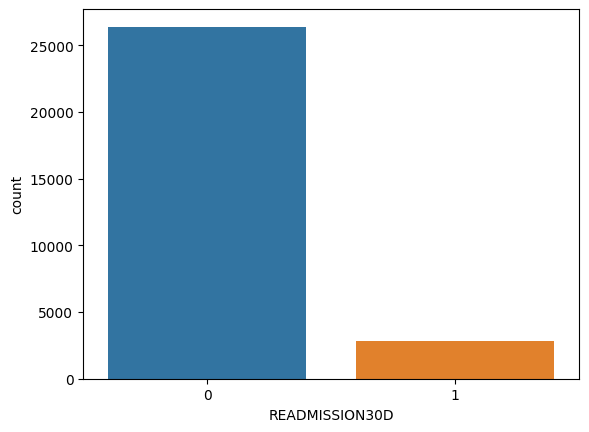

In [10]:
sns.countplot(x=full_df['READMISSION30D'], label = "Count")

In [11]:
#next we need to scale the lab values 
lab_cols = ['PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE']

def scale_labs(df, lab_cols):
    # create a DataFrame with only the lab columns
    lab_df = df[lab_cols]

    # replace missing values (-99) with NaN
    lab_df = lab_df.replace(-99, np.nan)

    # impute missing values with the median
    imputer = SimpleImputer(strategy='median')
    
    #transform lab values 
    lab_df = imputer.fit_transform(lab_df)

    # create a StandardScaler object
    scaler = StandardScaler()

    # fit the scaler to the lab data
    scaler.fit(lab_df)

    # transform the lab data
    scaled_data = scaler.transform(lab_df)

    # create a new DataFrame with the scaled lab data
    scaled_lab_df = pd.DataFrame(scaled_data, columns=lab_cols)

    # create a new DataFrame that contains both the scaled lab columns and the other columns from the input DataFrame
    new_df = pd.concat([df.drop(lab_cols, axis=1), scaled_lab_df], axis=1)

    return new_df


scaled_df  = scale_labs(full_df, lab_cols)

In [12]:
#convert these two to binary 
display(scaled_df['EMERGNCY'].value_counts())
display(scaled_df['INOUT'].value_counts())

No     23943
Yes     5245
Name: EMERGNCY, dtype: int64

Inpatient     29110
Outpatient       78
Name: INOUT, dtype: int64

In [13]:
#convert EMERGENCY and INOUT
def convert_binary(df): 
    encoding_EMERGENCY = {'No': 0, 'Yes': 1}
    encoding_INOUT = {'Inpatient': 1, 'Outpatient': 0}

    df['EMERGNCY'] = df['EMERGNCY'].map(encoding_EMERGENCY)
    df['INOUT'] = df['INOUT'].map(encoding_INOUT)
    df_encoded = df 
    return df_encoded

df_encoded = convert_binary(scaled_df)

In [14]:
#convert these two to binary 
display(df_encoded['EMERGNCY'].value_counts())
display(df_encoded['INOUT'].value_counts())

0    23943
1     5245
Name: EMERGNCY, dtype: int64

1    29110
0       78
Name: INOUT, dtype: int64

In [15]:
def split_data(df): 
    X = df.drop(labels = ['READMISSION30D'], axis = 1) 
    y = pd.DataFrame(df['READMISSION30D']) 
    X_train,X_test,y_train,y_test = train_test_split(X, y, stratify = y, test_size= .2, random_state= 0 )
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = split_data(df_encoded)
display(X_train.info()) 
display(X_test.info())
display(y_train.info())
display(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             23350 non-null  int64  
 1   OrganSpacePost_84          23350 non-null  int64  
 2   PneumoniaPost_88           23350 non-null  int64  
 3   ReintubPost_90             23350 non-null  int64  
 4   PulmEmbPost_92             23350 non-null  int64  
 5   ProgRenalPost_96           23350 non-null  int64  
 6   UTIPost_100                23350 non-null  int64  
 7   MIPost_105                 23350 non-null  int64  
 8   BleedingTfnPost_108        23350 non-null  int64  
 9   DVTPost_109                23350 non-null  int64  
 10  DVTProphylaxisPost28_24    23350 non-null  int64  
 11  SepsisPost_112             23350 non-null  int64  
 12  ReOPPost_116               23350 non-null  int64  
 13  CardiacComplications       23350 non-null  

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             5838 non-null   int64  
 1   OrganSpacePost_84          5838 non-null   int64  
 2   PneumoniaPost_88           5838 non-null   int64  
 3   ReintubPost_90             5838 non-null   int64  
 4   PulmEmbPost_92             5838 non-null   int64  
 5   ProgRenalPost_96           5838 non-null   int64  
 6   UTIPost_100                5838 non-null   int64  
 7   MIPost_105                 5838 non-null   int64  
 8   BleedingTfnPost_108        5838 non-null   int64  
 9   DVTPost_109                5838 non-null   int64  
 10  DVTProphylaxisPost28_24    5838 non-null   int64  
 11  SepsisPost_112             5838 non-null   int64  
 12  ReOPPost_116               5838 non-null   int64  
 13  CardiacComplications       5838 non-null   

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  23350 non-null  int64
dtypes: int64(1)
memory usage: 364.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  5838 non-null   int64
dtypes: int64(1)
memory usage: 91.2 KB


None

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [17]:
# Linear Kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

print_score(clf , X_train, y_train, X_test, y_test, train=True)
print_score(clf , X_train, y_train, X_test, y_test, train=False)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Result:
Accuracy Score: 91.73%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.924248     0.706667  0.917259      0.815457      0.903356
recall         0.989577     0.236396  0.917259      0.612987      0.917259
f1-score       0.955798     0.354278  0.917259      0.655038      0.898041
support    21108.000000  2242.000000  0.917259  23350.000000  23350.000000
_______________________________________________
Confusion Matrix: 
 [[20888   220]
 [ 1712   530]]

Test Result:
Accuracy Score: 92.05%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.926458    0.748718  0.920521     0.837588      0.909378
recall        0.990714    0.260250  0.920521     0.625482      0.920521
f1-score      0.957509    0.386243  0.920521     0.671876      0.902614
support    5277.000000

In [18]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]

In [19]:
weighted_clf = svm.SVC(kernel="linear", class_weight={1: 10})
weighted_clf.fit(X_train, y_train)

print_score(weighted_clf, X_train, y_train, X_test, y_test, train=True)
print_score(weighted_clf, X_train, y_train, X_test, y_test, train=False)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Result:
Accuracy Score: 84.11%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.952272     0.321672  0.841113      0.636972      0.891724
recall         0.867728     0.590544  0.841113      0.729136      0.841113
f1-score       0.908036     0.416483  0.841113      0.662260      0.860839
support    21108.000000  2242.000000  0.841113  23350.000000  23350.000000
_______________________________________________
Confusion Matrix: 
 [[18316  2792]
 [  918  1324]]

Test Result:
Accuracy Score: 83.81%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.950874    0.314313  0.838129     0.632594      0.889704
recall        0.865643    0.579323  0.838129     0.722483      0.838129
f1-score      0.906259    0.407524  0.838129     0.656891      0.858334
support    5277.000000

In [20]:
ww = weighted_clf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - weighted_clf.intercept_[0] / ww[1]

In [21]:
X_train.shape
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,DeepSSIPost_81,OrganSpacePost_84,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,ProgRenalPost_96,UTIPost_100,MIPost_105,BleedingTfnPost_108,DVTPost_109,DVTProphylaxisPost28_24,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,PartialorFullFuncStatus,DiabetesBinary,MFI5,ObesityBinary,MinorityPatient,AGE,Ethnicity_14,GenderData_1,GenderData_2,GenderData_3,RaceData_4,RaceData_5,RaceData_Black,RaceData_7,RaceData_8,RaceData_9,RaceData_10,RaceData_11,TransferStatus_17,TransferStatus_18,DispoLocationPost_28,DispoLocationPost_30,MEDMGMT_14,StandardHip_17,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_51,INOUT,EMERGNCY,OPTIME,TOTHLOS,HTOODAY,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE
12914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,90,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,60,5,0,0.240328,0.797158,0.038465,0.351203,0.196341,0.126329
22146,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,3,1,1,83,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,71,3,1,-0.554088,-0.875529,-0.338898,0.378501,-1.588609,0.647428
27742,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,78,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,69,5,1,-0.289283,-1.210067,-0.364056,-0.959116,-1.441396,0.608346
10145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,1,76,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,66,6,2,-0.818894,-0.959164,-0.213111,0.596887,-0.502917,-0.954950
6070,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,0,0,86,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,52,6,1,-0.554088,-0.122820,0.126516,1.279345,-1.975041,1.442104


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not        READMISSION30D
12914               0
22146               0
27742               0
10145               0
6070                0
...               ...
6599                1
19668               0
4731                0
11843               0
4404                0

[23350 rows x 1 columns]

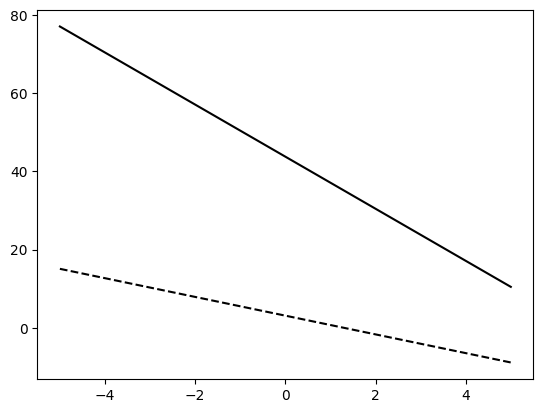

In [22]:
# # plot separating hyperplanes and samples
# import matplotlib.pyplot as plt
# h0 = plt.plot(xx, yy, 'k-', label='no weights')
# h1 = plt.plot(xx, wyy, 'k--', label='with weights')
# plt.scatter(X_train_df.iloc[:, 0], X_train_df.iloc[:, 1], c=y_train, cmap=plt.cm.Paired)
# plt.legend()

# plt.axis('tight')
# plt.show()

In [23]:
# HYPER PARAMETER TUNING

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.918 total time=18.6min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.919 total time=16.6min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.918 total time=17.0min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=15.1min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.918 total time=15.6min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.918 total time=33.2min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.919 total time=15.8min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.918 total time=17.5min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=14.9min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.918 total time=15.2min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.918 total time=17.6min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.919 total time=15.3min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.918 total time=15.8min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.913 total time=14.5min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.918 total time=17.7min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.918 total time=21.5min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.919 total time=21.7min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.918 total time=16.1min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.913 total time=14.4min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.918 total time=15.0min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.918 total time=17.5min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.919 total time=15.3min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.918 total time=15.8min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.913 total time=14.4min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.918 total time=15.0min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.918 total time=19.0min


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:

grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
# PCA + SVM 

from sklearn.decomposition import PCA

pca = PCA(n_components=3)


X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
param_grid2 = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid2 = GridSearchCV(svm.SVC(), param_grid2, refit=True, verbose=3)
grid2.fit(X_train_pca, y_train)
best_params2 = grid2.best_params_
print(f"Best params: {best_params2}")

svm_clf_pca = svm.SVC(**best_params2)
svm_clf_pca.fit(X_train_pca, y_train)

print_score(svm_clf_pca, X_train_pca, y_train, X_test_pca, y_test, train=True)
print_score(svm_clf_pca, X_train_pca, y_train, X_test_pca, y_test, train=False)